<a href="https://colab.research.google.com/github/Informathiques/2024-Autumn-Cluj-Napoca/blob/main/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialisation

In [7]:
# @title
!pip install pymongo[srv] > /dev/null 2>&1

from google.colab import userdata
import os
import base64

# Base64-encoded MongoDB URI (fallback option)
encoded_uri = "bW9uZ29kYitzcnY6Ly9pbmZyb21hdGhpcXVlczpkRk91WTZYaWFRNjhxeE5KQGluZm9ybWF0aGlxdWVzLjgzanFlLm1vbmdvZGIubmV0Lz9yZXRyeVdyaXRlcz10cnVlJnc9bWFqb3JpdHkmc3NsPXRydWUmdGxzQWxsb3dJbnZhbGlkQ2VydGlmaWNhdGVzPXRydWU="

# Step 1: Try to get the MongoDB URI from the environment variable (SMONGO_URI)
try:
    MONGO_URI = os.getenv("SMONGO_URI")
    if not MONGO_URI:
        raise ValueError("SMONGO_URI not found or is empty.")
except (KeyError, ValueError, Exception) as e:
    #print(f"Environment variable 'SMONGO_URI' is missing or cannot be accessed: {e}")
    #print("Falling back to the base64-encoded URI...")
    # Step 2: Decode the base64-encoded URI as fallback
    MONGO_URI = base64.b64decode(encoded_uri).decode('utf-8')
print("Succes on initialisation. Continue")



Succes on initialisation. Continue


# Data form, enter and submit

---



In [8]:
# @title
import pymongo
from pymongo import MongoClient
import ipywidgets as widgets
from IPython.display import display, clear_output
from datetime import datetime

client = MongoClient(MONGO_URI)
db = client["myDatabase"]  # Database name
collection = db["users"]  # Collection name

# Global variable to store current user ID for editing
current_user_id = None

# Function to add or update user in MongoDB
def add_or_update_user(first_name, second_name, height, gender, dob):
    global current_user_id
    # Convert the Date of Birth to datetime
    dob_datetime = datetime.combine(dob, datetime.min.time()) if dob else None

    user_data = {
        "First Name": first_name,
        "Second Name": second_name,
        "Height": height,
        "Gender": gender,
        "Date of Birth": dob_datetime
    }

    if current_user_id is None:
        # Insert new user
        result = collection.insert_one(user_data)
        current_user_id = result.inserted_id
        with message_output:
            clear_output()
            print(f"User {first_name} {second_name} added to the database.")
    else:
        # Update existing user
        collection.update_one({"_id": current_user_id}, {"$set": user_data})
        with message_output:
            clear_output()
            print(f"User {first_name} {second_name}'s data updated in the database.")

# Function to display an error message (acts like a modal)
def show_error(message):
    with message_output:
        clear_output()
        print(f"Error: {message}")

# Function to handle the submit action
def on_submit(b):
    global current_user_id
    first_name = first_name_input.value
    second_name = second_name_input.value
    height = int(height_input.value)
    gender = gender_input.value
    dob = dob_input.value

    # Validation: Check if first name, second name, and date of birth are filled
    if not first_name or not second_name:
        show_error("First Name and Second Name cannot be empty.")
        return

    if not dob:
        show_error("Date of Birth cannot be empty.")
        return

    # Insert or update the user data in MongoDB
    add_or_update_user(first_name, second_name, height, gender, dob)

    # Disable fields and activate edit button
    first_name_input.disabled = True
    second_name_input.disabled = True
    height_input.disabled = True
    gender_input.disabled = True
    dob_input.disabled = True
    submit_button.disabled = True
    edit_button.disabled = False

# Function to handle the edit action
def on_edit(b):
    # Enable fields and disable edit button
    first_name_input.disabled = False
    second_name_input.disabled = False
    height_input.disabled = False
    gender_input.disabled = False
    dob_input.disabled = False
    submit_button.disabled = False
    edit_button.disabled = True

# Customizing font size and layout
text_layout = widgets.Layout(width='300px', height='30px', font_size='16px')
button_style = widgets.ButtonStyle(button_color='lightblue')

# Create input fields with initial disabled state for edit button
first_name_input = widgets.Text(description="First Name  ", layout=text_layout)
second_name_input = widgets.Text(description="Second Name", layout=text_layout)
height_input = widgets.BoundedFloatText(value=150, min=100, max=300, description="Height (cm)", layout=text_layout)

# Gender radio buttons (now stacked vertically using VBox)
gender_input = widgets.RadioButtons(
    options=['Male', 'Female'],
    value='Male',  # Default value
    description='Gender',
    layout=widgets.Layout(width='auto')  # Allow auto width to fit both options
)

# Date of Birth input
dob_input = widgets.DatePicker(description='Date of Birth', layout=text_layout)

# Submit and Edit buttons with custom color and font size
submit_button = widgets.Button(description="Submit", style=button_style, layout=widgets.Layout(width='150px', height='40px', font_size='16px'))
edit_button = widgets.Button(description="Edit", disabled=True, style=button_style, layout=widgets.Layout(width='150px', height='40px', font_size='16px'))

# Output widget to display error or success messages
message_output = widgets.Output()

# Attach button event handlers
submit_button.on_click(on_submit)
edit_button.on_click(on_edit)

# Group gender input and date picker into an HBox for better layout
gender_dob_box = widgets.HBox([gender_input, dob_input])

# Display the widgets using VBox for vertical alignment
display(widgets.VBox([first_name_input, second_name_input, height_input, gender_dob_box, submit_button, edit_button, message_output]))


View the data

In [16]:
# libraries import
import matplotlib.pyplot as plt
import ipywidgets as widgets

# fetch data from MongoDB and return it as a list
def fetch_data():
    users = collection.find()
    data = []
    for user in users:
        data.append({
            'First Name': user['First Name'],
            'Second Name': user['Second Name'],
            'Height': user['Height'],
            '_id': user['_id']
        })
    return data

data = fetch_data()

data




[{'First Name': 'yves',
  'Second Name': 'papegay',
  'Height': 184,
  '_id': ObjectId('6710079ab09453458ea4120e')},
 {'First Name': 'Artems',
  'Second Name': 'Perticollo',
  'Height': 178,
  '_id': ObjectId('6710107e88b329f208b65314')},
 {'First Name': 'toto',
  'Second Name': 'lharicot',
  'Height': 170,
  '_id': ObjectId('67101372b09453458ea41212')},
 {'First Name': '',
  'Second Name': '',
  'Height': 150,
  '_id': ObjectId('6711336bfc021194330b1902')},
 {'First Name': 'Nicolas ',
  'Second Name': 'Pontionis',
  'Height': 150,
  '_id': ObjectId('6711344efc021194330b1905')},
 {'First Name': 'Iopl',
  'Second Name': 'Kotti',
  'Height': 150,
  '_id': ObjectId('67116a2cfc021194330b190d')},
 {'First Name': 'Popotski',
  'Second Name': 'Oplo',
  'Height': 150,
  '_id': ObjectId('67116aa5fc021194330b190f')},
 {'First Name': 'Makar',
  'Second Name': 'Melnyk',
  'Height': 180,
  '_id': ObjectId('6715fa44c41408e6eeca4848')},
 {'First Name': 'yves',
  'Second Name': 'papegay',
  'Height': 

# World Health Organization comparing

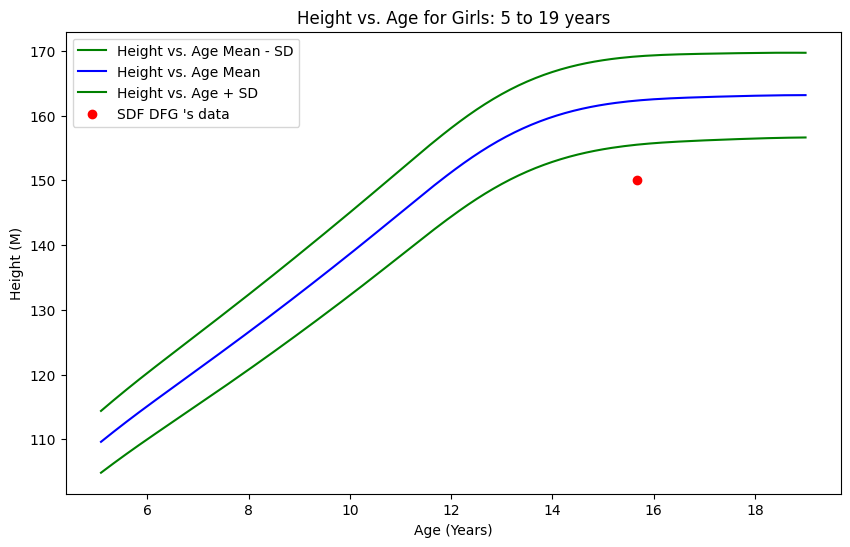

In [6]:
# @title
import requests
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the difference in years and months
def calculate_age_in_months(dob, current_date):
    years_diff = current_date.year - dob.year
    months_diff = current_date.month - dob.month

    # Adjust for the case where the current month is before the birth month
    if months_diff < 0:
        years_diff -= 1
        months_diff += 12

    # Total months
    total_months = years_diff * 12 + months_diff
    return total_months



# URLs for boys and girls height data
# https://www.who.int/tools/growth-reference-data-for-5to19-years/indicators/height-for-age

boys_url = "https://cdn.who.int/media/docs/default-source/child-growth/growth-reference-5-19-years/height-for-age-(5-19-years)/hfa-boys-z-who-2007-exp.xlsx?sfvrsn=7fa263d_2"
girls_url = "https://cdn.who.int/media/docs/default-source/child-growth/growth-reference-5-19-years/height-for-age-(5-19-years)/hfa-girls-z-who-2007-exp.xlsx"
# Gender input value from the first part of the form (Male or Female)
user_gender = gender_input.value  # Assuming this comes from the form
custom_label_uname = f"{first_name_input.value} {second_name_input.value} 's data"
# Step 1: Choose the appropriate URL based on gender
if user_gender == "Male":
    url = boys_url
    custom_title='Height vs. Age for Boys: 5 to 19 years'
elif user_gender == "Female":
    url = girls_url
    custom_title='Height vs. Age for Girls: 5 to 19 years'
else:
    raise ValueError("Invalid gender selected. Please select either Male or Female.")

response = requests.get(url)

# Step 2: Download the file from the chosen URL
response = requests.get(url)

# Step 3: Save the file locally
file_name = "height_for_age_data.xlsx"
with open(file_name, "wb") as file:
    file.write(response.content)

# Step 4: Read the Excel file into a DataFrame, skipping the first row
df = pd.read_excel(file_name)

# Step 5: Plot 'M' (height) on the Y-axis and 'Month/12' (age in years) on the X-axis
x_values = df['Month']/12  # Convert age in months to years
y_values1 = df['SD1neg']  # Height values
y_values2 = df['SD0']  # Height values
y_values3 = df['SD1']  # Height values

# Step 6: Plot the data from the DataFrame
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values1, label='Height vs. Age Mean - SD', color='green')
plt.plot(x_values, y_values2, label='Height vs. Age Mean', color='blue')
plt.plot(x_values, y_values3, label='Height vs. Age + SD', color='green')

# Step 7: Plot the current user's height as a dot
current_user_height = height_input.value  # Replace with the actual height value of the current user
# Calculate the age in months
dob = dob_input.value  # Retrieve the date from the DatePicker widget
# Get the current date
current_date = datetime.today().date()
age_in_months = calculate_age_in_months(dob, current_date)
current_user_age = age_in_months/12  # Replace with the actual age of the current user in years
plt.scatter(current_user_age, current_user_height, color='red', label=custom_label_uname)

# Step 8: Labels, Title, and Legends
plt.xlabel('Age (Years)')
plt.ylabel('Height (M)')
plt.title(custom_title)
plt.legend()

# Display the plot
plt.show()




In [ ]:
# libraries import
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Function to fetch data from MongoDB and return it as a list
def fetch_data():
    users = collection.find()
    #print(type(users))
    data = []
    #print(type(users_data))
    for user in users:
        data.append({
            'First Name': user['First Name'],
            'Second Name': user['Second Name'],
            'Height': user['Height'],
            '_id': user['_id']
        })
        #print(users_data)
    return data

# Function to update the plot with data fetched from MongoDB
def update_plot():
    users_data = fetch_data()
    if users_data:
        first_names = [f"{user['First Name']} {user['Second Name']}" for user in users_data]
        heights = [user['Height'] for user in users_data]
        #for user in users_data:

        colors = ['red' if item['_id'] == current_user_id else 'skyblue' for item in users_data]

        plt.figure(figsize=(8,6))
        plt.bar(first_names, heights, color=colors)
        plt.xlabel('Full Name')
        plt.ylabel('Height (cm)')
        plt.title('User Heights')
        plt.xticks(rotation=45)
        plt.show()

# Function to handle the 'Compare to others' button click
def on_compare(b):
    clear_output(wait=True)
    update_plot()


update_plot()

